In [68]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [6]:
base_url = "http://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities.json"
response = requests.get(base_url)
result = json.loads(response.text)
col_name = result['history']['columns']
data_shares = pd.DataFrame(columns=col_name)

url_share = 'http://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities/SBER.json'
response = requests.get(url_share)
result = json.loads(response.text)
resp_date = result['history']['data']
data_shares = pd.DataFrame(resp_date, columns=col_name)
a = len(resp_date)

b = 100
while a == 100:
    url_opt = '?start=' + str(b)
    url_next_page = url_share + url_opt
    response = requests.get(url_next_page)
    result = json.loads(response.text)
    resp_date = result['history']['data']
    data_next_page = pd.DataFrame(resp_date, columns=col_name)
    data_shares = pd.concat([data_shares, data_next_page], ignore_index=True)
    a = len(resp_date)
    b = b + 100

/tmp/ipykernel_121000/355816610.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_shares = pd.concat([data_shares, data_next_page], ignore_index=True)


In [7]:
data_shares

,BOARDID,TRADEDATE,SHORTNAME,SECID,NUMTRADES,VALUE,OPEN,LOW,HIGH,LEGALCLOSEPRICE,...,MARKETPRICE2,MARKETPRICE3,ADMITTEDQUOTE,MP2VALTRD,MARKETPRICE3TRADESVALUE,ADMITTEDVALUE,WAVAL,TRADINGSESSION,CURRENCYID,TRENDCLSPR
0,TQBR,2013-03-25,Сбербанк,SBER,140,5.934000e+07,96.00,96.00,101.14,98.66,...,99.99,99.99,99.99,8.572434e+09,8.572434e+09,8.572434e+09,NaN,3,SUR,NaN
1,TQBR,2013-03-26,Сбербанк,SBER,183,1.260304e+08,98.58,97.08,99.31,97.13,...,97.82,97.82,97.82,1.221847e+10,1.221847e+10,1.221847e+10,NaN,3,SUR,-1.61
2,TQBR,2013-03-27,Сбербанк,SBER,176,1.218359e+08,97.90,95.39,98.00,96.73,...,96.45,96.45,96.45,1.251981e+10,1.251981e+10,1.251981e+10,NaN,3,SUR,-0.46
3,TQBR,2013-03-28,Сбербанк,SBER,299,1.924698e+08,96.38,95.72,98.66,98.64,...,97.74,97.74,97.74,1.257281e+10,1.257281e+10,1.257281e+10,NaN,3,SUR,1.90
4,TQBR,2013-03-29,Сбербанк,SBER,121,7.726886e+07,98.60,98.32,99.09,98.83,...,98.77,98.77,98.77,2.611474e+09,2.611474e+09,2.611474e+09,NaN,3,SUR,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,TQBR,2023-11-27,Сбербанк,SBER,197671,2.247182e+10,287.40,278.88,289.00,281.57,...,284.09,284.09,NaN,2.077662e+10,2.077662e+10,NaN,0.0,3,SUR,-1.58
2694,TQBR,2023-11-28,Сбербанк,SBER,114603,1.272361e+10,282.40,277.32,282.51,280.06,...,279.56,279.56,NaN,1.167852e+10,1.167852e+10,NaN,0.0,3,SUR,-0.86
2695,TQBR,2023-11-29,Сбербанк,SBER,98546,8.285652e+09,279.36,276.20,280.56,277.57,...,277.94,277.94,NaN,7.471714e+09,7.471714e+09,NaN,0.0,3,SUR,-1.11
2696,TQBR,2023-11-30,Сбербанк,SBER,136936,1.539141e+10,276.70,272.75,278.65,276.80,...,275.02,275.02,NaN,1.234019e+10,1.234019e+10,NaN,0.0,3,SUR,0.25


In [56]:
time_and_open_df = data_shares[['TRADEDATE', 'OPEN']]
time_and_open_df

,TRADEDATE,OPEN
0,2013-03-25,96.00
1,2013-03-26,98.58
2,2013-03-27,97.90
3,2013-03-28,96.38
4,2013-03-29,98.60
...,...,...
2693,2023-11-27,287.40
2694,2023-11-28,282.40
2695,2023-11-29,279.36
2696,2023-11-30,276.70


In [62]:
time_and_open_df = time_and_open_df.dropna()
time_and_open_df['TRADEDATE'] = time_and_open_df['TRADEDATE'].astype("datetime64[ns]")
time_and_open_df['TRADEDATE'] = time_and_open_df['TRADEDATE'].values.astype("float64")

In [64]:
X = np.array(time_and_open_df['TRADEDATE'])
X = X.reshape(-1, 1)
y = np.array(time_and_open_df['OPEN'])
reg = LinearRegression().fit(X, y)

In [65]:
y_pred = reg.predict(X)

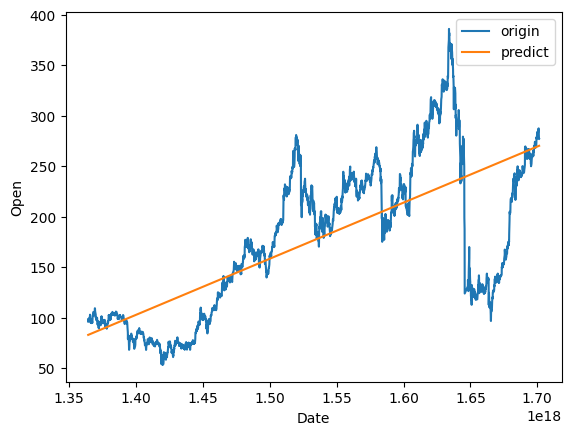

In [67]:
plt.Figure(figsize=(6, 7))
plt.plot(X, y, label='origin')
plt.plot(X, y_pred, label='predict')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open');